[[ 5.1  3.5]
 [ 4.9  3. ]
 [ 4.7  3.2]] [0 0 0] bry
[1 1 1 ..., 2 2 2]
(378, 319)
[[1 1 1 ..., 2 2 2]
 [1 1 1 ..., 2 2 2]
 [1 1 1 ..., 2 2 2]
 ..., 
 [0 0 0 ..., 2 2 2]
 [0 0 0 ..., 2 2 2]
 [0 0 0 ..., 2 2 2]]


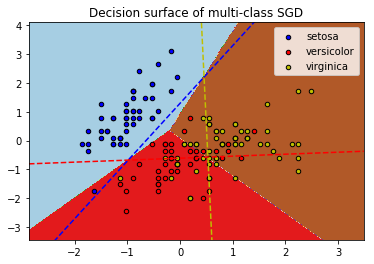

In [6]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn.linear_model import SGDClassifier

iris = datasets.load_iris()  #数据集

x = iris.data[:,:2]
y = iris.target
colors = "bry"
print(x[0:3],y[0:3],colors)

#shuffle
idx = np.arange(x.shape[0])    
np.random.seed(13)
np.random.shuffle(idx)
x = x[idx]
y = y[idx]

#standardize
mean = x.mean(axis=0)   #行均值
std = x.std(axis=0)     #行标准差
x = (x-mean) / std      #标准化

h = 0.02  #步长（网格里面的步长）

clf = SGDClassifier(alpha=0.001,max_iter=100).fit(x,y)   

#create a mesh to plot in  创建网格区域
x_min,x_max = x[:,0].min() - 1,x[:,0].max() + 1
y_min,y_max = x[:,1].min() - 1,x[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))  #meshgrid 用于生成网格采样点的函数

#plot the decision boundary.for that，we will assign a color to each 
#point in the mesh [x_min,x_max]*[y_min,y_max]
z = clf.predict(np.c_[xx.ravel(),yy.ravel()])    #Ravel  降维函数，按行优先排序
print(z)
# put the result into a color plot 
z = z.reshape(xx.shape)   
print(xx.shape)
print(z)
cs = plt.contourf(xx,yy,z,cmap=plt.cm.Paired)    
#contourf 不绘制等高线   plt.cm中cm表示colormap，paired表示两个两个相近色彩输出，比如浅蓝、深蓝；浅红、深红；浅绿，深绿
plt.axis('tight') 

#plot also the training points
for i,color in zip(clf.classes_,colors):
    idx = np.where(y == i)
    plt.scatter(x[idx,0],x[idx,1],c=color,label=iris.target_names[i],
                cmap=plt.cm.Paired,edgecolor='black',s=20)
    #  scatter 散点图 ，s表示点点的大小  
plt.title("Decision surface of multi-class SGD")
plt.axis('tight')

#plot the three one-against-all classifiers
xmin,xmax = plt.xlim()
ymin,ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_

def plot_hyperplane(c,color):
    def line(x0):
        return (-(x0 * coef[c,0]) - intercept[c]) / coef[c,1]
    
    plt.plot([xmin,xmax],[line(xmin),line(xmax)],ls="--",color=color)

    
for i,color in zip(clf.classes_,colors):
    plot_hyperplane(i,color)
plt.legend()
plt.show()